In [45]:
import pandas as pd
import csv
import os
import numpy as np

### Merge and process data 

In [21]:
DATASET_PATH_1 = "./dataset/raw/ielts_writing_dataset_2.csv"
DATASET_PATH_2 = "./dataset/raw/ielts-writing-essays.csv"
DATASET_PATH_3 = "./dataset/raw/train.csv"
DATASET_PATH_4 = "./dataset/raw/test.csv"
DATASET_PATH_5 = "./dataset/raw/train (1).csv"
DATASET_PATH_6 = "./dataset/raw/test (1).csv"

In [72]:
# read from the csv files
# format 1
# df_1 = pd.read_csv(DATASET_PATH_1)
df_2 = pd.read_csv(DATASET_PATH_2)

# format 2
df_3 = pd.read_csv(DATASET_PATH_3)
df_4 = pd.read_csv(DATASET_PATH_4)
df_5 = pd.read_csv(DATASET_PATH_5)
df_6 = pd.read_csv(DATASET_PATH_6)

# handle format 1
df_2 = df_2[["Essay", "Overall"]]

# handle format 2
concat_df = pd.concat([df_3[['essay', 'band']],
                             df_4[['essay', 'band']],
                             df_5[['essay', 'band']],
                             df_6[['essay', 'band']]], 
                             axis=0, ignore_index=True)

# remove newline and return characters
concat_df['band'] = concat_df['band'].str.replace(r'[\n\r]+', '', regex=True)
df_2.columns = ['essay', 'band']

df_all = pd.concat([df_2, concat_df], axis=0, ignore_index=True)
df_all.drop_duplicates(subset=['essay'], keep='first', inplace=True)


def int_2_float(val):
    try:
        val = float(val)
        return '{:.1f}'.format(val)
    except ValueError:
        return str(val)

df_all['band'] = df_all['band'].apply(int_2_float)

print("********** SUMMARY ****************")
print(f"TOTAL NUMBER OF RECORDS: {len(df_all)}")

********** SUMMARY ****************
TOTAL NUMBER OF RECORDS: 10345


In [73]:
int_2_float(4)

'4.0'

In [75]:
EXPORT_PATH = './dataset/processed/clean_data.csv'
df_all.to_csv(EXPORT_PATH, index=False, header=["essay", 'band'], mode='w')

### Plot the distribution of all data

In [76]:
np_band = np.array(df_all['band'])
print(set(np_band))
dist_dict = dict()

keys = [str(key) for key in np.arange(0.0, 9.5, 0.5)]
keys.append('<4')

# init the dictionary
for i in keys:
    dist_dict[i] = 0

for i in np_band:
    dist_dict[i] += 1



{'<4', '6.0', '9.0', '8.5', '5.0', '6.5', '8.0', '7.5', '7.0', '3.5', '3.0', '1.0', '4.5', '5.5', '4.0'}
{'0.0': 0, '0.5': 0, '1.0': 1, '1.5': 0, '2.0': 0, '2.5': 0, '3.0': 2, '3.5': 4, '4.0': 541, '4.5': 620, '5.0': 1057, '5.5': 1047, '6.0': 1286, '6.5': 1280, '7.0': 1476, '7.5': 1158, '8.0': 786, '8.5': 430, '9.0': 137, '<4': 520}


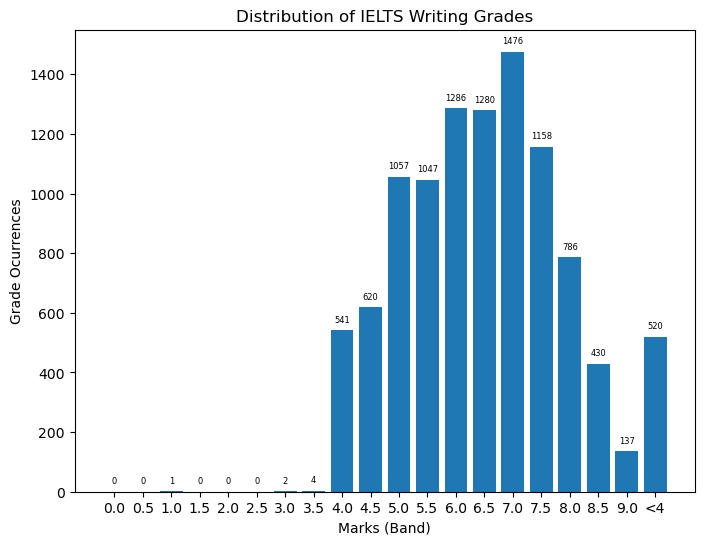

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Distribution of IELTS Writing Grades')
bars = plt.bar(list(dist_dict.keys()), list(dist_dict.values()))


# Citation: ChatGPT, response to author query. OpenAI [Online]. https://chatgpt.com/
# ------------- Citation begins here ---------
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 20, int(y), ha='center', va='bottom', fontsize=6)
# ------------- Citation begins here ---------

plt.xlabel('Marks (Band)')
plt.ylabel('Grade Ocurrences')
plt.savefig("./dataset/distribution_of_grade.png")
plt.show()